<h1 style="text-align: center;">ETL</h1>

In [1]:
pip install google-cloud-bigquery

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [6]:
df = pd.read_csv('Desktop/tableau/geolocation.csv')

In [8]:
df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [9]:
df['country'] = 'Brazil'

In [11]:
df.to_csv('Desktop/tableau/geolocation.csv', index=False)

In [14]:
from google.cloud import bigquery

key_path = "sales-pet-project-65e37b3498cd.json"
project_id = "sales-pet-project"
dataset_id = "sales_dataset"

client = bigquery.Client.from_service_account_json(key_path)

tables_to_load = [
    ("orders", "Desktop/tableau/orders.csv"),
    ("customers", "Desktop/tableau/customers.csv"),
    ("products", "Desktop/tableau/products.csv"),
    ("sellers", "Desktop/tableau//sellers.csv"),
    ("geolocation", "Desktop/tableau/geolocation.csv"),
    ("order_items", "Desktop/tableau/order_items.csv"),
    ("payments", "Desktop/tableau/payments.csv"),
]

for table_name, csv_path in tables_to_load:
    table_id = f"{project_id}.{dataset_id}.{table_name}"
    job_config = bigquery.LoadJobConfig(
        source_format=bigquery.SourceFormat.CSV,
        skip_leading_rows=1,
        autodetect=True
    )
    print(f"Завантажую {table_name} з файлу {csv_path} в таблицю {table_id}...")
    with open(csv_path, "rb") as source_file:
        load_job = client.load_table_from_file(
            source_file,
            table_id,
            job_config=job_config
        )
    load_job.result()
    print(f"Завантажено {load_job.output_rows} рядків до таблиці {table_name}.\n")

Завантажую orders з файлу Desktop/tableau/orders.csv в таблицю sales-pet-project.sales_dataset.orders...
Завантажено 99441 рядків до таблиці orders.

Завантажую customers з файлу Desktop/tableau/customers.csv в таблицю sales-pet-project.sales_dataset.customers...
Завантажено 99441 рядків до таблиці customers.

Завантажую products з файлу Desktop/tableau/products.csv в таблицю sales-pet-project.sales_dataset.products...
Завантажено 32951 рядків до таблиці products.

Завантажую sellers з файлу Desktop/tableau//sellers.csv в таблицю sales-pet-project.sales_dataset.sellers...
Завантажено 3095 рядків до таблиці sellers.

Завантажую geolocation з файлу Desktop/tableau/geolocation.csv в таблицю sales-pet-project.sales_dataset.geolocation...
Завантажено 1000163 рядків до таблиці geolocation.

Завантажую order_items з файлу Desktop/tableau/order_items.csv в таблицю sales-pet-project.sales_dataset.order_items...
Завантажено 112650 рядків до таблиці order_items.

Завантажую payments з файлу Deskt

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display

In [18]:
order_items = pd.read_csv("Desktop/tableau/order_items.csv")
geolocations = pd.read_csv("Desktop/tableau/geolocation.csv")
customers = pd.read_csv("Desktop/tableau/customers.csv")
orders = pd.read_csv("Desktop/tableau/orders.csv")
payments = pd.read_csv("Desktop/tableau/payments.csv")
sellers = pd.read_csv("Desktop/tableau/sellers.csv")
products = pd.read_csv("Desktop/tableau/products.csv")

In [19]:
datasets = [order_items, geolocations, customers, orders, payments, sellers, products]

In [21]:
datasets_dic = {'order_items':order_items, 'geolocations':geolocations, 'customers': customers, 
                'orders':orders, 'payments' : payments, 'sellers': sellers, 'products': products}

In [22]:
seller_order_counts = order_items.groupby('seller_id')['order_id'].nunique().reset_index()

seller_order_counts.columns = ['seller_id', 'total_orders']

seller_order_counts = seller_order_counts.sort_values(by='total_orders', ascending=False)

print(seller_order_counts.head())

                             seller_id  total_orders
1235  6560211a19b47992c3666cc44a7e94c0          1854
881   4a3ca9315b744ce9f8e9374361493884          1806
2481  cc419e0650a3c5ba77189a1882b7556a          1706
368   1f50f920176fa81dab994f9023523100          1404
2643  da8622b14eb17ae2831f4ac5b9dab84a          1314


In [23]:
for df in datasets:
    display(df.head(3))

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,country
0,1037,-23.545621,-46.639292,sao paulo,SP,Brazil
1,1046,-23.546081,-46.644820,sao paulo,SP,Brazil
2,1046,-23.546129,-46.642951,sao paulo,SP,Brazil


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


,product_id,product category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sport leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [24]:
for key in datasets_dic:
    print(key)
    display(datasets_dic[key].info())
    print()

order_items
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


None


geolocations
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 6 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
 5   country                      1000163 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 45.8+ MB


None


customers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None


orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


None


payments
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


None


sellers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


None


products
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product category            32341 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


None

In [25]:
for df in datasets:
    display(df.describe())

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [26]:
unique_customers = orders["customer_id"].nunique()

In [27]:
unique_customers = customers["customer_unique_id"].nunique()
total_customers = customers.shape[0]

print(f"Unique Customer Unique IDs: {unique_customers}")
print(f"Total Customers: {total_customers}")

Unique Customer Unique IDs: 96096
Total Customers: 99441


In [28]:
customers["customer_unique_id"].value_counts().value_counts()

count
1     93099
2      2745
3       203
4        30
5         8
6         6
7         3
17        1
9         1
Name: count, dtype: int64

In [29]:
for df in datasets:
    display(df.isnull().sum())

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
country                        0
dtype: int64

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [36]:
date_columns = [
    "order_purchase_timestamp", 
    "order_approved_at", 
    "order_delivered_carrier_date", 
    "order_delivered_customer_date", 
    "order_estimated_delivery_date"
]

orders[date_columns] = orders[date_columns].apply(pd.to_datetime)

In [37]:
orders["order_status"].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [38]:
orders["order_status"].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [39]:
payments["payment_type"].unique()

array(['credit_card', 'UPI', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [40]:
payments["payment_type"].value_counts()

payment_type
credit_card    76795
UPI            19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [44]:
geolocations = geolocations.drop_duplicates()

In [45]:
geolocations.to_csv('Desktop/tableau/geolocation.csv', index=False)

In [46]:
#Rewrite to BigQuery
for table_name, csv_path in tables_to_load:
    table_id = f"{project_id}.{dataset_id}.{table_name}"
    job_config = bigquery.LoadJobConfig(
        source_format=bigquery.SourceFormat.CSV,
        skip_leading_rows=1,
        autodetect=True,
        write_disposition=bigquery.WriteDisposition.WRITE_TRUNCATE
    )
    print(f"Перезаписую {table_name} з файлу {csv_path} в таблицю {table_id}...")
    with open(csv_path, "rb") as source_file:
        load_job = client.load_table_from_file(
            source_file,
            table_id,
            job_config=job_config
        )
    load_job.result()
    print(f"Перезаписано {load_job.output_rows} рядків у таблиці {table_name}.\n")

Перезаписую orders з файлу Desktop/tableau/orders.csv в таблицю sales-pet-project.sales_dataset.orders...
Перезаписано 99441 рядків у таблиці orders.

Перезаписую customers з файлу Desktop/tableau/customers.csv в таблицю sales-pet-project.sales_dataset.customers...
Перезаписано 99441 рядків у таблиці customers.

Перезаписую products з файлу Desktop/tableau/products.csv в таблицю sales-pet-project.sales_dataset.products...
Перезаписано 32951 рядків у таблиці products.

Перезаписую sellers з файлу Desktop/tableau//sellers.csv в таблицю sales-pet-project.sales_dataset.sellers...
Перезаписано 3095 рядків у таблиці sellers.

Перезаписую geolocation з файлу Desktop/tableau/geolocation.csv в таблицю sales-pet-project.sales_dataset.geolocation...
Перезаписано 738332 рядків у таблиці geolocation.

Перезаписую order_items з файлу Desktop/tableau/order_items.csv в таблицю sales-pet-project.sales_dataset.order_items...
Перезаписано 112650 рядків у таблиці order_items.

Перезаписую payments з файлу

<h1 style="text-align: center;">Analysis</h1>

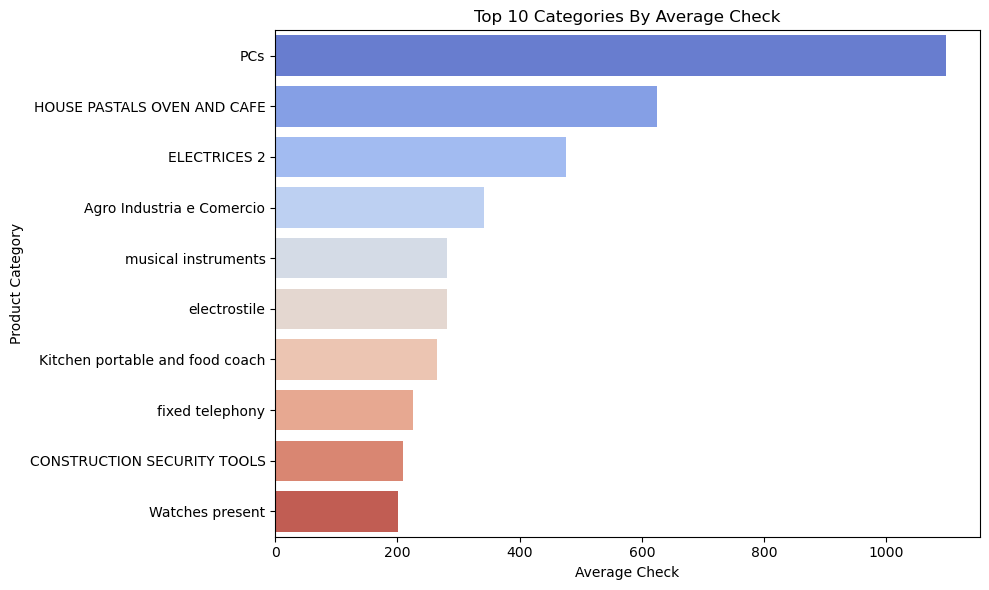

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

orders = pd.read_csv("Desktop/tableau/orders.csv")
order_items = pd.read_csv("Desktop/tableau/order_items.csv")
products = pd.read_csv("Desktop/tableau/products.csv")
order_payments = pd.read_csv("Desktop/tableau/payments.csv")
merged_items = order_items.merge(products[['product_id', 'product category']], on='product_id', how='left')
avg_price_cat = merged_items.groupby('product category')['price'].mean().sort_values(ascending=False).head(10)


plt.figure(figsize=(10,6))
sns.barplot(
    x=avg_price_cat.values,
    y=avg_price_cat.index,
    hue=avg_price_cat.index,         
    palette='coolwarm',
    dodge=False,
    legend=False                     
)
plt.title("Top 10 Сategories By Average Check")
plt.xlabel("Average Check")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()

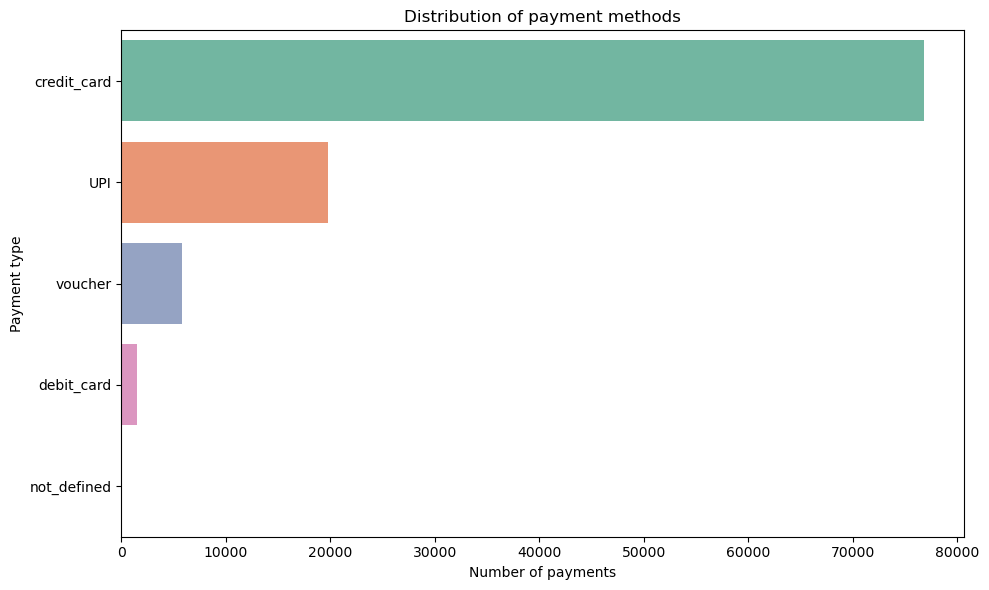

In [63]:
payment_dist = order_payments['payment_type'].value_counts().reset_index()
payment_dist.columns = ['payment_type', 'count']

plt.figure(figsize=(10,6))
sns.barplot(
    data=payment_dist,
    x='count',
    y='payment_type',
    hue='payment_type',     
    palette='Set2',
    dodge=False,            
    legend=False            
)
plt.title("Distribution of payment methods")
plt.xlabel("Number of payments")
plt.ylabel("Payment type")
plt.tight_layout()
plt.show()

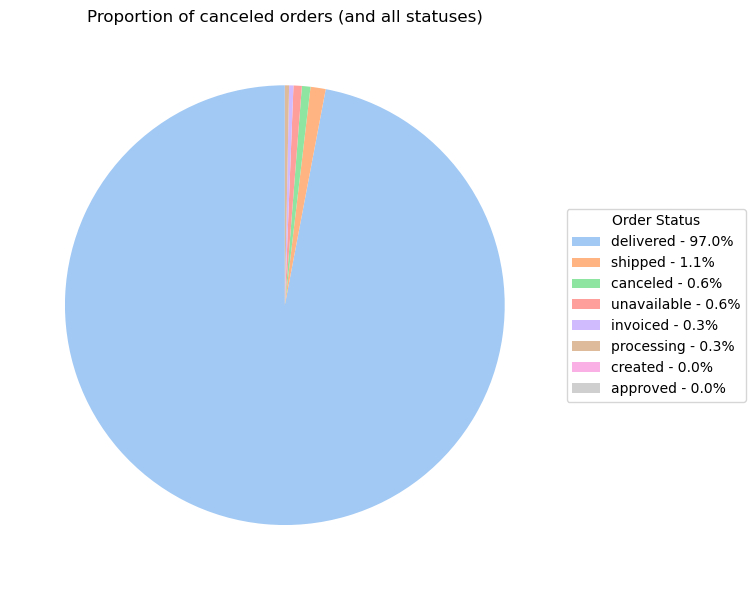

In [102]:
status_share = orders['order_status'].value_counts(normalize=True).reset_index()
status_share.columns = ['status', 'share']
labels = [f"{row['status']} - {row['share']*100:.1f}%" for _, row in status_share.iterrows()]
plt.figure(figsize=(10,6))
wedges, texts = plt.pie(
    status_share['share'],
    colors=sns.color_palette('pastel'),
    startangle=90
)

plt.legend(
    wedges,
    labels,
    title="Order Status",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=10
)

plt.title("Proportion of canceled orders (and all statuses)")
plt.tight_layout()
plt.show()

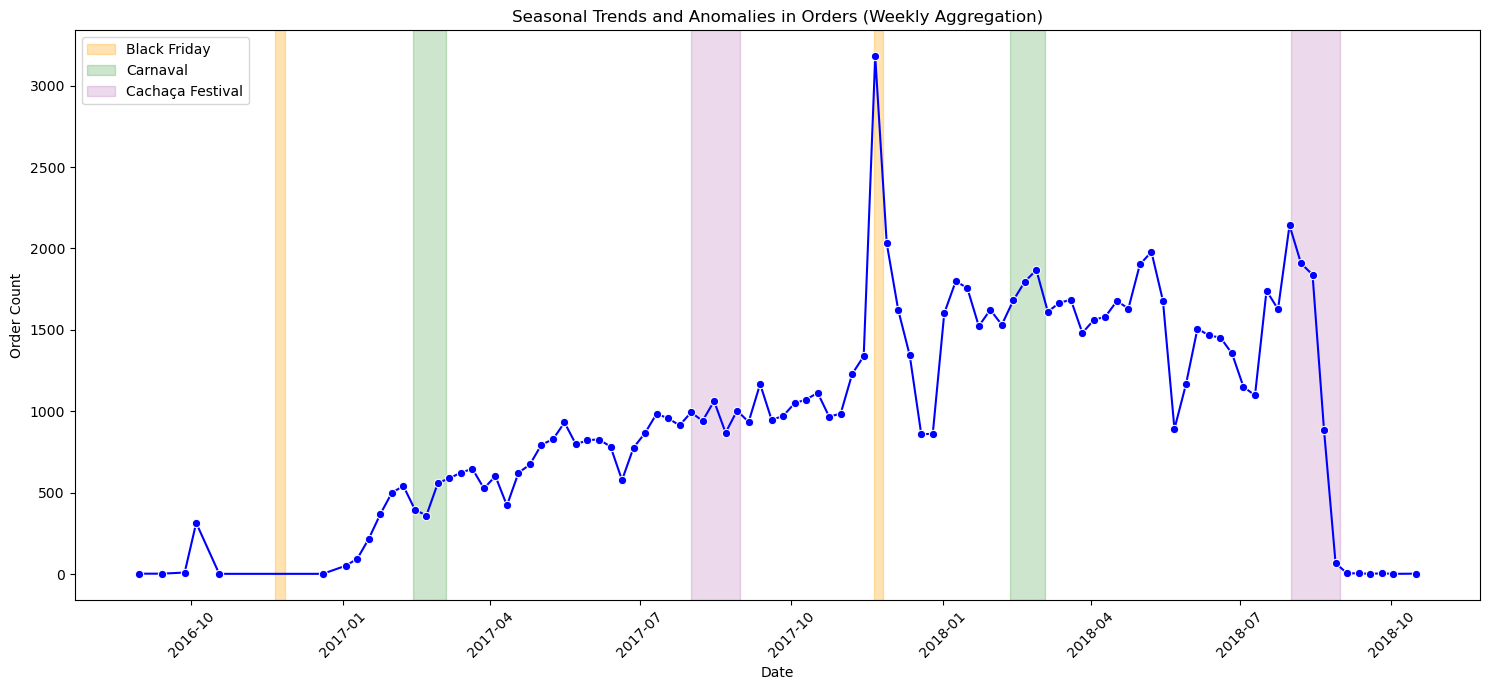

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['week_start'] = orders['order_purchase_timestamp'].dt.to_period('W-MON').dt.start_time
weekly_orders = orders.groupby('week_start').size().reset_index(name='order_count')

plt.figure(figsize=(15,7))
sns.lineplot(data=weekly_orders, x='week_start', y='order_count', marker='o', color='blue')

black_fridays = [
    ('2016-11-21', '2016-11-27'),
    ('2017-11-20', '2017-11-26'),
]
for start, end in black_fridays:
    plt.axvspan(pd.Timestamp(start), pd.Timestamp(end), color='orange', alpha=0.3, label='Black Friday')

carnavals = [
    ('2017-02-13', '2017-03-05'),
    ('2018-02-11', '2018-03-04'),
]
for start, end in carnavals:
    plt.axvspan(pd.Timestamp(start), pd.Timestamp(end), color='green', alpha=0.2, label='Carnaval')

cachacas = [
    ('2016-08-01', '2016-08-31'),
    ('2017-08-01', '2017-08-31'),
    ('2018-08-01', '2018-08-31'),
]
for start, end in cachacas:
    dt_start = pd.Timestamp(start)
    if dt_start >= pd.Timestamp('2016-09-04'):
        plt.axvspan(dt_start, pd.Timestamp(end), color='purple', alpha=0.15, label='Cachaça Festival')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict()
for h, l in zip(handles, labels):
    if l not in by_label:
        by_label[l] = h
plt.legend(by_label.values(), by_label.keys(), loc='upper left')

plt.title('Seasonal Trends and Anomalies in Orders (Weekly Aggregation)')
plt.xlabel('Date')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1 style="text-align: center;">ВИСНОВКИ</h1>

## **Географічний розподіл продажів**

Переважна більшість покупців і продавців зосереджена в штаті Сан-Паулу (SP). Одине лише місто Сан-Паулу забезпечує більше замовлень, ніж сумарно наступні п’ять найбільших міст країни. Інші помітні ринки: штат Ріу-де-Жанейро (RJ), а також регіони Парана (центр – місто Кюрітіба) і Мінас-Жерайс (Белу-Оризонті). Такі геодані вказують на значне перевищення активності у густонаселених регіонах Бразилії (особливо в мегаполісі Сан-Паулу) порівняно з іншими областями.

## **Фактори, що впливають на обсяг продажів**

Цінова стратегія та маржа: категорії з високою середньою ціною (наприклад, electronics / комп’ютерні комплектуючі) мають вищий середній чек, а bed_bath_table – найпопулярніша за числом купівель, але з нижчим середнім чеком. За оцінками, категорія home_comfort_2 має найвищу маржу (`~`79%), тоді як small_home_appliances – найнижчу (`~`10%). Для низькомаржинальних товарів рекомендуються промоції та знижки у низький сезон.

Спосіб оплати: більшість покупців використовують кредитні картки (зручність та безпека). Політика оплати безпосередньо впливає на комфорт покупців і, отже, на обсяг транзакцій.

Обробка замовлень: рівень скасувань замовлень низький (~0,6%), що вказує на високий рівень виконання і задоволеності клієнтів. Таким чином, затримки з доставкою чи відмова від замовлень не є основними вузькими місцями в цьому датасеті.

## **Аномалії та сезонні впливи**

Чорна п’ятниця (листопад): у 2017 р. на тижні акцій Black Friday спостерігалися суттєві стрибки продажів – понад дворазове збільшення замовлень порівняно з попереднім тижнем.

Бразильський карнавал (лютий–березень): традиційні святкові періоди призводять до зростання замовлень на початку року. У dataset помітно, що після новорічних свят попит збільшується у лютому-березні, ймовірно за рахунок карнавалу.

Серпень (фестиваль Cachaça): середній рівень замовлень підіймається в серпні. За даними, саме серпень показав найвищий місячний обсяг замовлень, що узгоджується з відомими локальними фестивалями.

Літній спад (вересень): у вересні 2018 р. спостерігається різке падіння замовлень – це пов’язано зі завершенням періоду збору даних (двирічний інтервал).